# Proof of work for framework migrations

Jupyter Notebook Demo with Python, pandas and matplotlib.

## Context

This analysis shows the progress of the rewrite work from Technical Requirement AB311. Here, the standardization towards JavaEE 8 has to be carried out. In the course of this, the database access technology JPA\* has to be used instead of JDBC\*\*.

<sub><sup>\*JPA: Java Persistence API (newer way of accessing a database)</sub></sup><br/>
<sub><sup>\*\*JDBC: Java Database Connectivity (classic direct access to database)</sub></sup>


## Idea

**Tracking of changes via the version control system**

Importing the development history with project status as of 01/15/2019 from the software version control system.

<sup>Please note that this is synthetic / generated data, as the real dataset is not available. More details about the generation [see this notebook](https://github.com/feststelltaste/software-analytics/blob/master/notebooks/Generating%20Synthetic%20Data%20based%20on%20a%20Git%20Log.ipynb).</sup>

In [1]:
import pandas as pd
log = pd.read_csv("../dataset/git_log_refactoring_simple.csv", parse_dates=[3])
log.head()

,additions,deletions,file,timestamp
0,19,0,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-31 19:41:29
1,55,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20
2,29,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20
3,0,99,web/VisitController.java,2017-12-30 00:38:54
4,19,0,model/Pet.java,2017-12-30 00:38:54


### Detection of the framework components
Using a regular expression, the two database access technologies can be extracted from the file path. All other files are filtered out using `dropna()`.

In [2]:
log['tech'] = log['file'].str.extract("/(jpa|jdbc)/")
log = log.dropna()
log.head()

,additions,deletions,file,timestamp,tech
0,19,0,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-31 19:41:29,jpa
1,55,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa
2,29,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa
25,0,47,repository/jpa/package-info.java,2017-12-29 15:28:42,jpa
103,0,26,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-25 01:27:16,jpa


## Analysis

### Work progress
To track the progress, we calculate the changed source code lines as an approximation.

In [3]:
log['lines'] = log['additions'] - log['deletions']
log.head()

,additions,deletions,file,timestamp,tech,lines
0,19,0,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-31 19:41:29,jpa,19
1,55,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa,55
2,29,0,repository/jpa/JpaVisitRepositoryImpl.java,2017-12-30 12:48:20,jpa,29
25,0,47,repository/jpa/package-info.java,2017-12-29 15:28:42,jpa,-47
103,0,26,repository/jpa/JpaOwnerRepositoryImpl.java,2017-12-25 01:27:16,jpa,-26


### Time summary
The respective progresses are merged according to their timestamps.

In [4]:
log_timed = log.groupby(['timestamp', 'tech']).lines.sum()
log_timed.head()

timestamp            tech
2013-05-15 03:35:33  jdbc    250
2013-05-16 02:15:44  jdbc     50
2013-05-17 15:12:26  jdbc     78
2013-05-24 05:52:31  jdbc    142
2013-05-28 08:15:35  jdbc    123
Name: lines, dtype: int64

### Visualization
For the comparison of progress, both technologies are listed side by side.

In [5]:
log_progress = log_timed.unstack().fillna(0).cumsum()
log_progress.head()

tech,jdbc,jpa
timestamp,,
2013-05-15 03:35:33,250.0,0.0
2013-05-16 02:15:44,300.0,0.0
2013-05-17 15:12:26,378.0,0.0
2013-05-24 05:52:31,520.0,0.0
2013-05-28 08:15:35,643.0,0.0


### Current status of framework migration
Results according to line changes per technology.

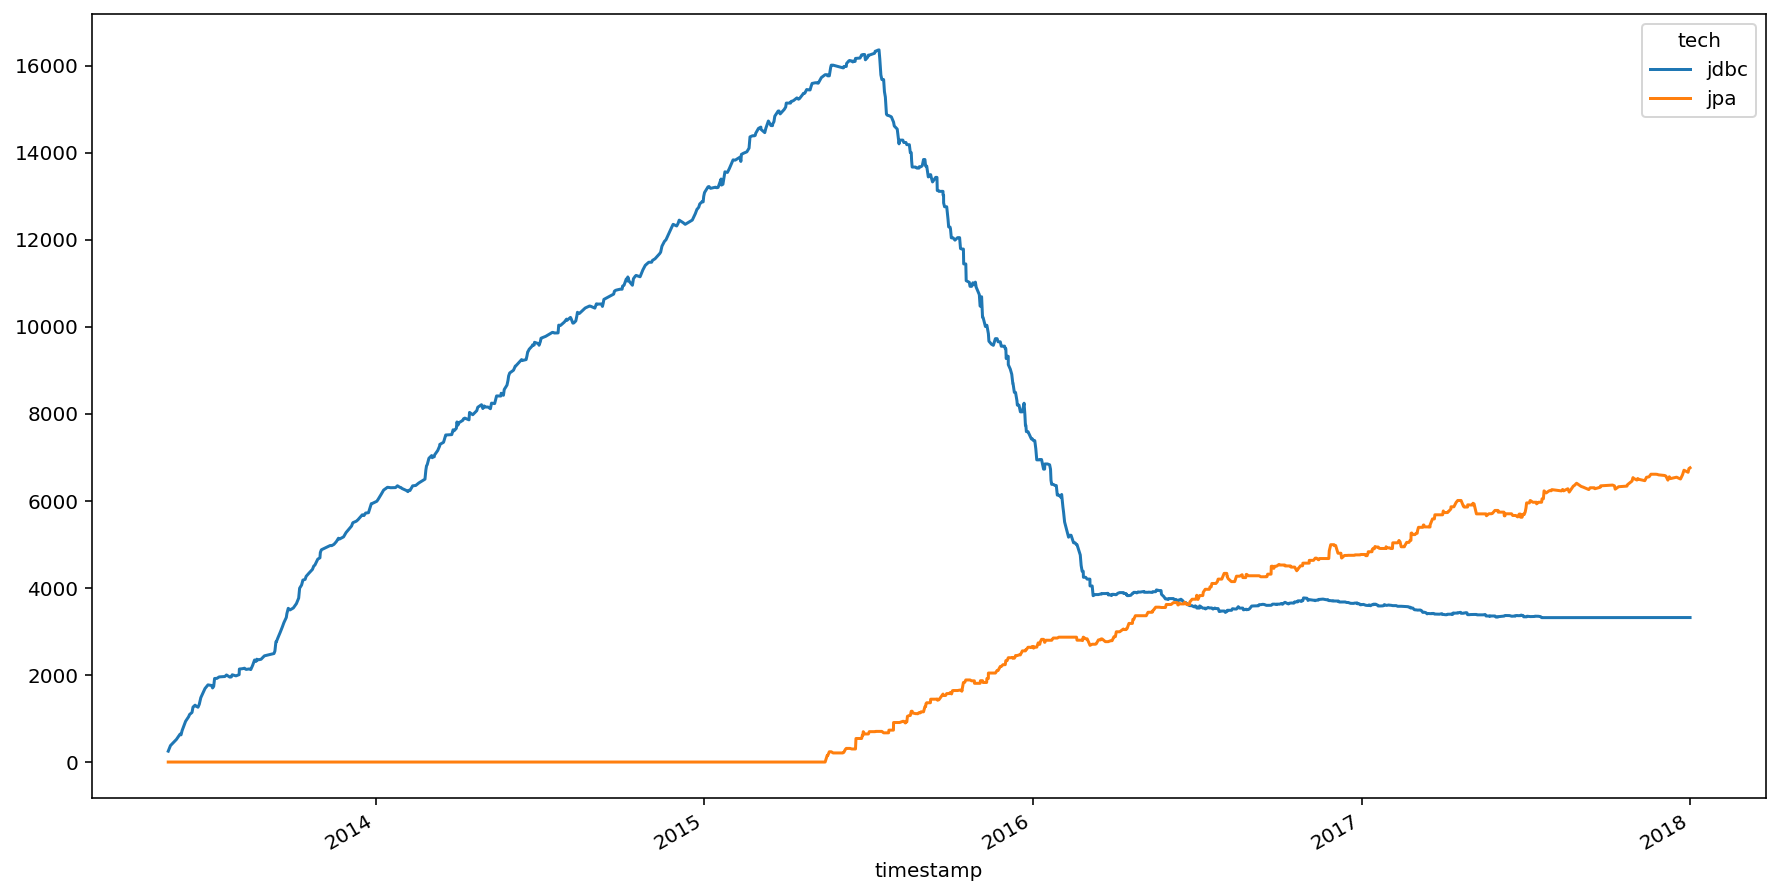

In [6]:
log_progress.plot(figsize=[15,8]);

## Conclusion
- The  work has progressed well
- There are no more changes in the JDBC part
- A complete deletion of the remaining JDBC parts can take place in the next two sprints, since everything has already been converted to JPA